In [2]:
%matplotlib ipympl
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import keras
print(tf. __version__)
print(keras.__version__)

2.10.0
2.10.0


In [5]:
train_url = 'https://raw.githubusercontent.com/Tim0n1/MLDL_zapiski/master/train.csv'
test_url_X = 'https://raw.githubusercontent.com/Tim0n1/MLDL_zapiski/master/test.csv'
test_url_y = 'https://raw.githubusercontent.com/Tim0n1/MLDL_zapiski/master/gender_submission.csv'

In [6]:
train_df = pd.read_csv(train_url)
testX_df = pd.read_csv(test_url_X)
testy_df = pd.read_csv(test_url_y)

In [7]:

train_X = train_df.drop(columns=['Survived','PassengerId','Name','Ticket', 'Embarked','Fare'])
train_X.loc[train_X['Sex'] == 'male' , ['Sex']] = 1
train_X.loc[train_X['Sex'] == 'female' , ['Sex']] = 0
train_X = train_X.fillna(0)
train_X.loc[train_X['Cabin'] != 0, ['Cabin']] = 1
print(train_X.shape)
train_y = train_df['Survived']
print(train_y.shape)
test_X = testX_df.drop(columns=['PassengerId','Name','Ticket', 'Embarked','Fare'])
test_X.loc[test_X['Sex'] == 'male' , ['Sex']] = 1
test_X.loc[test_X['Sex'] == 'female' , ['Sex']] = 0
test_X = test_X.fillna(0)
test_X.loc[test_X['Cabin'] != 0, ['Cabin']] = 1
print(test_X)
test_y = testy_df['Survived']

(891, 6)
(891,)
     Pclass  Sex   Age  SibSp  Parch Cabin
0         3    1  34.5      0      0     0
1         3    0  47.0      1      0     0
2         2    1  62.0      0      0     0
3         3    1  27.0      0      0     0
4         3    0  22.0      1      1     0
..      ...  ...   ...    ...    ...   ...
413       3    1   0.0      0      0     0
414       1    0  39.0      0      0     1
415       3    1  38.5      0      0     0
416       3    1   0.0      0      0     0
417       3    1   0.0      1      1     0

[418 rows x 6 columns]


In [9]:
input_shape = train_X.shape

In [10]:
train_X.to_numpy()
train_y.to_numpy()
test_X.to_numpy()
test_y.to_numpy()

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [11]:
train_X = np.asarray(train_X).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)
test_X = np.asarray(test_X).astype(np.float32)
test_y = np.asarray(test_y).astype(np.float32)

In [12]:
print((train_X))
print(len(train_y))

[[ 3.  1. 22.  1.  0.  0.]
 [ 1.  0. 38.  1.  0.  1.]
 [ 3.  0. 26.  0.  0.  0.]
 ...
 [ 3.  0.  0.  1.  2.  0.]
 [ 1.  1. 26.  0.  0.  1.]
 [ 3.  1. 32.  0.  0.  0.]]
891


In [13]:
train_X = train_X.reshape(891,6)
train_y = train_y.reshape(891)
test_X = test_X.reshape(418,6)
test_y = test_y.reshape(418)

In [14]:
train_X.shape, train_y.shape

((891, 6), (891,))

In [15]:
test_X.shape, test_y.shape

((418, 6), (418,))

In [13]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_dim=train_X.shape[1], activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(train_X, train_y, epochs=50,batch_size=6, validation_data=(test_X, test_y), verbose=1)

Epoch 1/50
149/149 [==============================] - 3s 7ms/step - loss: 0.8569 - accuracy: 0.5960 - val_loss: 0.6363 - val_accuracy: 0.6651
Epoch 2/50
149/149 [==============================] - 1s 6ms/step - loss: 0.6224 - accuracy: 0.6532 - val_loss: 0.5496 - val_accuracy: 0.7416
Epoch 3/50
149/149 [==============================] - 1s 6ms/step - loss: 0.5769 - accuracy: 0.6902 - val_loss: 0.5001 - val_accuracy: 0.7727
Epoch 4/50
149/149 [==============================] - 1s 6ms/step - loss: 0.5500 - accuracy: 0.7239 - val_loss: 0.4586 - val_accuracy: 0.7871
Epoch 5/50
149/149 [==============================] - 1s 5ms/step - loss: 0.5298 - accuracy: 0.7363 - val_loss: 0.4281 - val_accuracy: 0.8445
Epoch 6/50
149/149 [==============================] - 1s 5ms/step - loss: 0.5159 - accuracy: 0.7598 - val_loss: 0.4009 - val_accuracy: 0.8254
Epoch 7/50
149/149 [==============================] - 1s 6ms/step - loss: 0.5041 - accuracy: 0.7722 - val_loss: 0.3849 - val_accuracy: 0.9474
Epoch 

In [16]:
model.save('model_data')

INFO:tensorflow:Assets written to: model_data\assets


In [16]:
model = keras.models.load_model('model_data')

In [55]:

print(test_X[0:10])
def get_predicted_survivors(x):
    predicted_survivors = []
    model_prediction = model.predict(test_X[:])
    for n, i in enumerate(model_prediction):
        if i[0] >= x:
            predicted_survivors.append(n)
            #print(n,i[0])
    return predicted_survivors

[[ 3.   1.  34.5  0.   0.   0. ]
 [ 3.   0.  47.   1.   0.   0. ]
 [ 2.   1.  62.   0.   0.   0. ]
 [ 3.   1.  27.   0.   0.   0. ]
 [ 3.   0.  22.   1.   1.   0. ]
 [ 3.   1.  14.   0.   0.   0. ]
 [ 3.   0.  30.   0.   0.   0. ]
 [ 2.   1.  26.   1.   1.   0. ]
 [ 3.   0.  18.   0.   0.   0. ]
 [ 3.   1.  21.   2.   0.   0. ]]


## Do some statistic about the prediction accuracy of the model

In [18]:
print(get_predicted_survivors(0.555))


14/14 [==============================] - 1s 2ms/step
[1, 4, 6, 8, 12, 14, 15, 18, 19, 22, 24, 26, 36, 37, 43, 44, 48, 52, 53, 59, 63, 65, 66, 69, 70, 72, 73, 74, 77, 79, 80, 86, 87, 88, 89, 90, 92, 96, 98, 100, 104, 111, 112, 113, 114, 117, 119, 120, 122, 125, 127, 138, 141, 150, 156, 157, 159, 160, 161, 162, 165, 168, 169, 175, 176, 178, 179, 182, 184, 186, 194, 196, 197, 199, 200, 201, 203, 206, 208, 213, 216, 218, 220, 222, 224, 227, 231, 238, 239, 240, 241, 246, 248, 249, 250, 258, 262, 263, 268, 272, 273, 275, 280, 281, 282, 283, 284, 291, 296, 304, 305, 307, 309, 313, 314, 315, 324, 326, 330, 333, 335, 343, 344, 345, 347, 349, 350, 356, 359, 361, 362, 364, 367, 368, 371, 374, 375, 376, 382, 383, 385, 390, 391, 395, 397, 400, 402, 408, 409, 410, 411, 412, 414, 417]


In [19]:
y = []
x = np.linspace(0,1,num=100)
n_1_l = []
for i in x:
    n_1 = 0
    predicted_val = test_y[get_predicted_survivors(i)]
    for i in predicted_val:
        if i == 1:
            n_1 += 1
    print(n_1)
    accuracy = predicted_val.mean()
    n_1_l.append(n_1)
    y.append(accuracy)
print(y)
#plt.save('gradients_prediction.png'


14/14 [==============================] - 0s 2ms/step
152
14/14 [==============================] - 0s 2ms/step
150
14/14 [==============================] - 0s 2ms/step
150
14/14 [==============================] - 0s 2ms/step
150
14/14 [==============================] - 0s 2ms/step
149
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 1ms/step
148
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 2ms/step
147
14/14 [==============================] - 0s 2ms/step
147
14/14 [========================

C:\Users\timon\AppData\Local\Temp\ipykernel_16516\3386855699.py:11: RuntimeWarning: Mean of empty slice.
  accuracy = predicted_val.mean()
D:\Anaconda\envs\DL\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


14/14 [==============================] - 0s 2ms/step
0
14/14 [==============================] - 0s 2ms/step
0
[0.36363637, 0.36231884, 0.36407766, 0.36585367, 0.36430317, 0.3627451, 0.3654321, 0.4043716, 0.4088398, 0.41573033, 0.43657818, 0.50859106, 0.5174825, 0.51929826, 0.540146, 0.54444444, 0.5568182, 0.5787402, 0.5903614, 0.62288135, 0.6475771, 0.6591928, 0.6621622, 0.6651584, 0.6651584, 0.6712329, 0.6869159, 0.7, 0.7067308, 0.7192118, 0.7227723, 0.7263682, 0.72864324, 0.7323232, 0.7360406, 0.7360406, 0.742268, 0.742268, 0.742268, 0.742268, 0.7539267, 0.7619048, 0.77837837, 0.78688526, 0.78688526, 0.7955801, 0.8, 0.8, 0.80898875, 0.8181818, 0.84210527, 0.852071, 0.8666667, 0.88271606, 0.90384614, 0.91558444, 0.92763156, 0.92715234, 0.93333334, 0.94520545, 0.9444444, 0.943662, 0.9496403, 0.9496403, 0.94814813, 0.94736844, 0.9527559, 0.9516129, 0.94736844, 0.9433962, 0.9519231, 0.95098037, 0.95, 0.95, 0.95, 0.9484536, 0.9479167, 0.9479167, 0.9358974, 0.93333334, 0.92957747, 0.927536

C:\Users\timon\AppData\Local\Temp\ipykernel_16516\3484322439.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


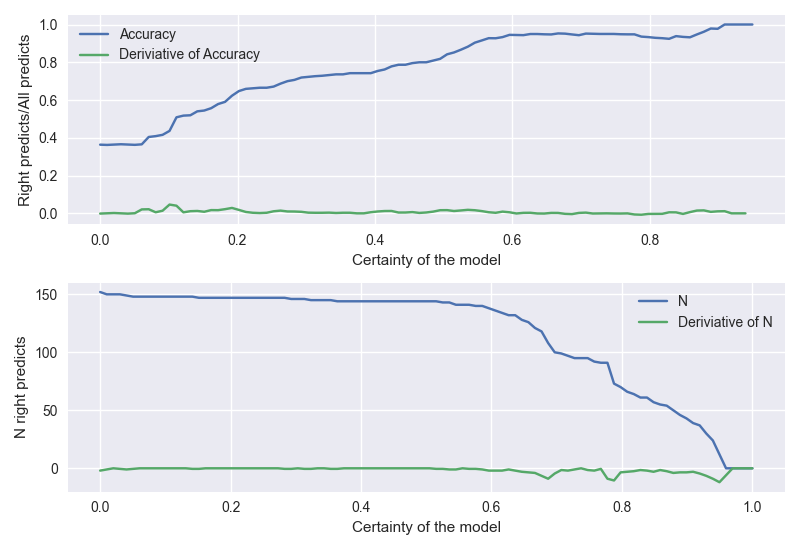

In [31]:
%matplotlib ipympl
#%matplotlib inline
fig, ax = plt.subplots(2,1)
ax[0].plot(x, y, label='Accuracy')
#plt.plot(x, n_1_l)
#plt.plot(x, np.gradient(n_1_l))
ax[0].plot(x, np.gradient(y), label='Deriviative of Accuracy')
ax[0].set_xlabel('Certainty of the model')
ax[0].set_ylabel('Right predicts/All predicts')
ax[0].legend()
ax[1].plot(x, n_1_l, label='N')
ax[1].plot(x, np.gradient(n_1_l), label='Deriviative of N')
ax[1].set_xlabel('Certainty of the model')
ax[1].set_ylabel('N right predicts')
ax[1].legend()
plt.style.use('seaborn')
fig.tight_layout()

In [23]:
fig.savefig('prediction_analysis.png')

## Inserting with custom data

In [53]:
test_input = [3,1,0,0,0,0]
def get_potential_survive_chance(input):
    input = np.array(input)
    input.resize(1,6)
    prediction = model.predict(input)
    prediction = prediction[0,0]
    chance = test_y[get_predicted_survivors(prediction)].mean()
    if chance == np.nan:
        chance = prediction
    return np.round(chance*100, 2)
print(get_potential_survive_chance(test_input))

14/14 [==============================] - 0s 927us/step
36.63
